In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
sns.set()
%matplotlib inline
%precision 3

'%.3f'

In [4]:
from sklearn import linear_model

In [5]:
wine_data_red = pd.read_csv('chap3/winequality-red.csv', sep=';')

In [7]:
wine_data_red.describe().to_csv('chap3/winequality-red-describe.csv')

In [8]:
wine_data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


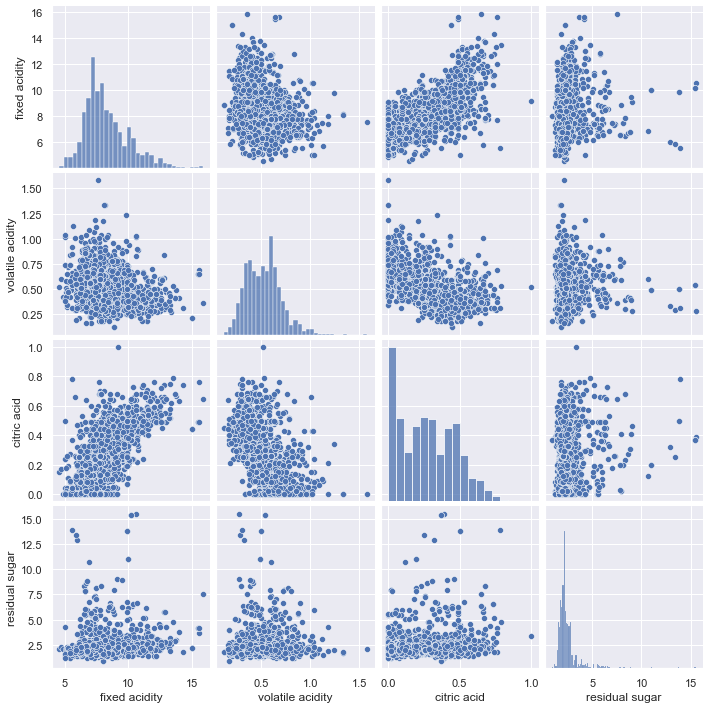

In [12]:
sns.pairplot(wine_data_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']])

In [15]:
student_data_math = pd.read_csv('chap3/student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [16]:
student_data_math_F = student_data_math[student_data_math.sex == 'F']
student_data_math_M = student_data_math[student_data_math.sex == 'M']

In [18]:
sorted_data_G1_F = student_data_math_F.G1.sort_values()
sorted_data_G1_F

137     4
0       5
1       5
79      5
386     6
       ..
286    18
198    18
293    18
359    18
374    19
Name: G1, Length: 208, dtype: int64

In [19]:
sorted_data_G1_M = student_data_math_M.G1.sort_values()
sorted_data_G1_M

248     3
144     5
164     5
161     5
153     5
       ..
113    18
129    18
245    18
42     19
47     19
Name: G1, Length: 187, dtype: int64

In [22]:
len_F = np.arange(len(sorted_data_G1_F))
len_M = np.arange(len(sorted_data_G1_M))

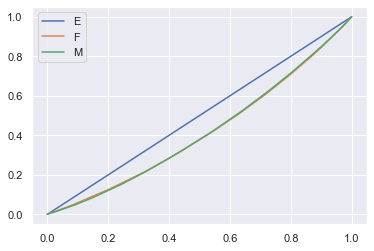

In [27]:
plt.plot(len_F/len_F.max(), len_F/len_F.max(), label = 'E')
plt.plot(len_F/len_F.max(), sorted_data_G1_F.cumsum()/sorted_data_G1_F.sum(), label = 'F')
plt.plot(len_M/len_M.max(), sorted_data_G1_M.cumsum()/sorted_data_G1_M.sum(), label = 'M')
plt.legend()
plt.grid(True)

In [28]:
def heikinsa(data):
    subt = []
    for i in range(0, len(data)-1):
        for j in range(i+1, len(data)):
            subt.append(np.abs(data[i] - data[j]))
    return float (sum(subt)) *2 / (len(data) ** 2)

In [29]:
def gini(heikinsa, data):
    return heikinsa / (2 * np.mean(data))

In [32]:
print('男性の数学の成績に関するジニ係数:', gini(heikinsa(np.array(sorted_data_G1_M)), np.array(sorted_data_G1_M)))
print('女性の数学の成績に関するジニ係数:', gini(heikinsa(np.array(sorted_data_G1_F)), np.array(sorted_data_G1_F)))

男性の数学の成績に関するジニ係数: 0.17197351667939903
女性の数学の成績に関するジニ係数: 0.1723782950865341
